# Л3: Задачи CV (Computer Vision). Создание приложения для генерации изображения с помощью моделей **Diffusion**

Раннее мы использовали библиотеку **Transformers**, с которой вы познакомились в предыдущей лабораторной. Она предоставляет API и простые инструменты для загрузки и использования предобученных моделей с ресурса [Hugging Face](https://huggingface.co/models).

Для использования моделей генерации изображений Diffusion требуется специальная библиотека **Diffusers**. С ее помощью можно загружать предобучение модели Diffusion через интерфейс pipeline (как у Transformers)

- Оффициальная документация Diffusers https://huggingface.co/docs/diffusers/index
- Оффициальная документация Transformers: https://huggingface.co/docs/transformers/main/en/index
- Описание и пример использования на Хабре: https://habr.com/ru/articles/704592/ 


**CV (Computer Vision)**, или *машинное зрение*, — это область искусственного интеллекта, которая занимается разработкой алгоритмов и методов, позволяющих компьютерам "видеть" и интерпретировать изображения и видео. Основная задача компьютерного зрения — автоматическое извлечение полезной информации из визуальных данных, например, распознавание объектов, определение их местоположения или анализ сцен. Это может включать такие приложения, как автоматизация вождения, распознавание лиц и обработка медицинских изображений.

**Diffusion models**, или *диффузионные модели* - это генеративные модели глубокого обучения, которые генерируют объекты из шума. Они шаг за шагом удаляют компоненты шума из начального случайного распределения с целью получить заданный объект.

(https://education.yandex.ru/handbook/ml/article/diffuzionnye-modeli)
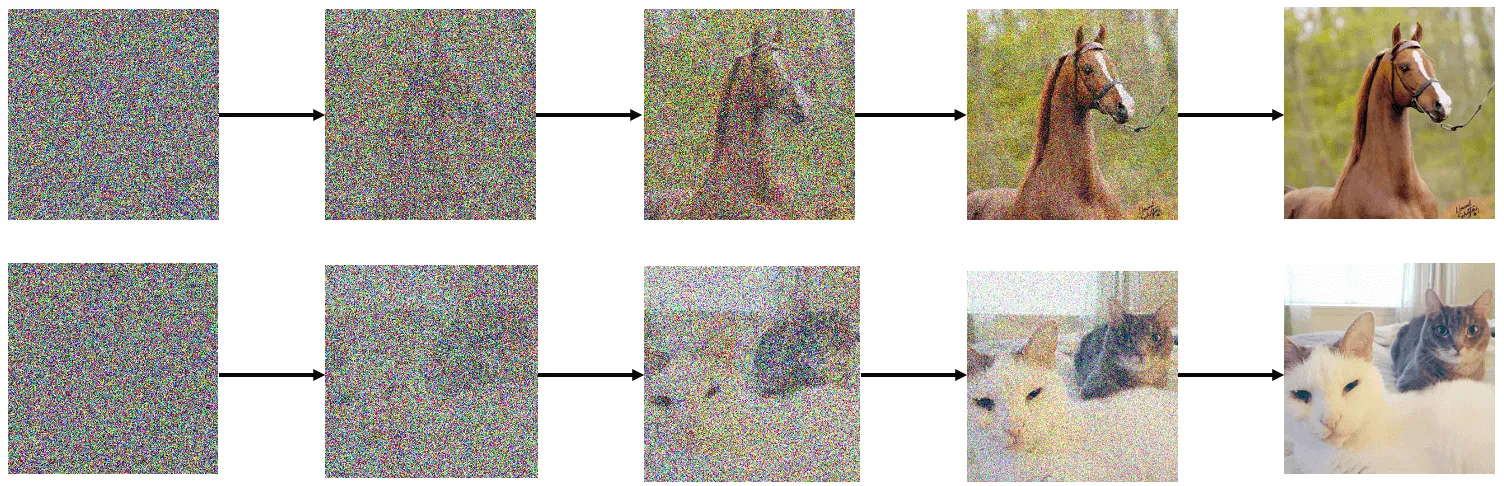

## 1/ Подготовка среды выполнения
На данной этапе вам наобходимо подготовить виртуальное окружение и установить все необходимые библиотеки.

1. Создать и активировать (или только активировать, если ранне создавали) виртуальной окружение `python`.

В терминале вводим следующие команды команды:

*создаем виртуальное окружение с помощью `python-venv`*
```
python -m venv env
```
*активируем виртуальное окружение*
```
env\Scripts\activate
```
**Примечание.** `env` - это название вашего виртуального окружения, назвать его можете как угодно.

После этого можем выбрать наш локальный интерпрететор pyhton, нажав на кнопку выше "Select kernel".

2. Устанавливаем все необходимые библиотеки

**Примечание.** Библиотеки установятся внутрь вашего виртуального окружения.

Нам понадобятся библиотеки Diffusers, Transformers, Accelerate.

```
pip install --upgrade diffusers accelerate transformers
```
Также для работы вышеперечисленных бибилиотек потребуется PyTorch:
```
pip install torch
```
Библиотека Gradio для создания web-приложения.
```
pip install gradio
```
Также для работы с изображение нам потребуется библиотека PIL (Python Image Library) `Pillow`
```
pip install Pillow
```

## 2/ Пошаговое тестирование идеи

Прежде чем создать итоговое приложение необходимо проверить те идеи и концепции, которые вы закладываете в ИИ-приложение. Интерфейс Jupyter Notebook как нельзя кстати подходит для этой задачи, выступая в роли некой "песочницы".

**Сперва необходмо определиться с какой предобученной моделью мы работает.** В данной лабораторной работе мы решаем задачу генерации изображения - **Text-to-Image** с помощью одной из предобученных CV-моделей глубокого обучения с Hugging Face https://huggingface.co/models. Сортируем модели по тегу **Text-to-Image**. 

Вывалиться список моделей для данной задачи. Для примера выберем одну из популярных на данный момент `stable-diffusion-v1-5/stable-diffusion-v1-5`. Страница с описанием и примером кода https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5. 

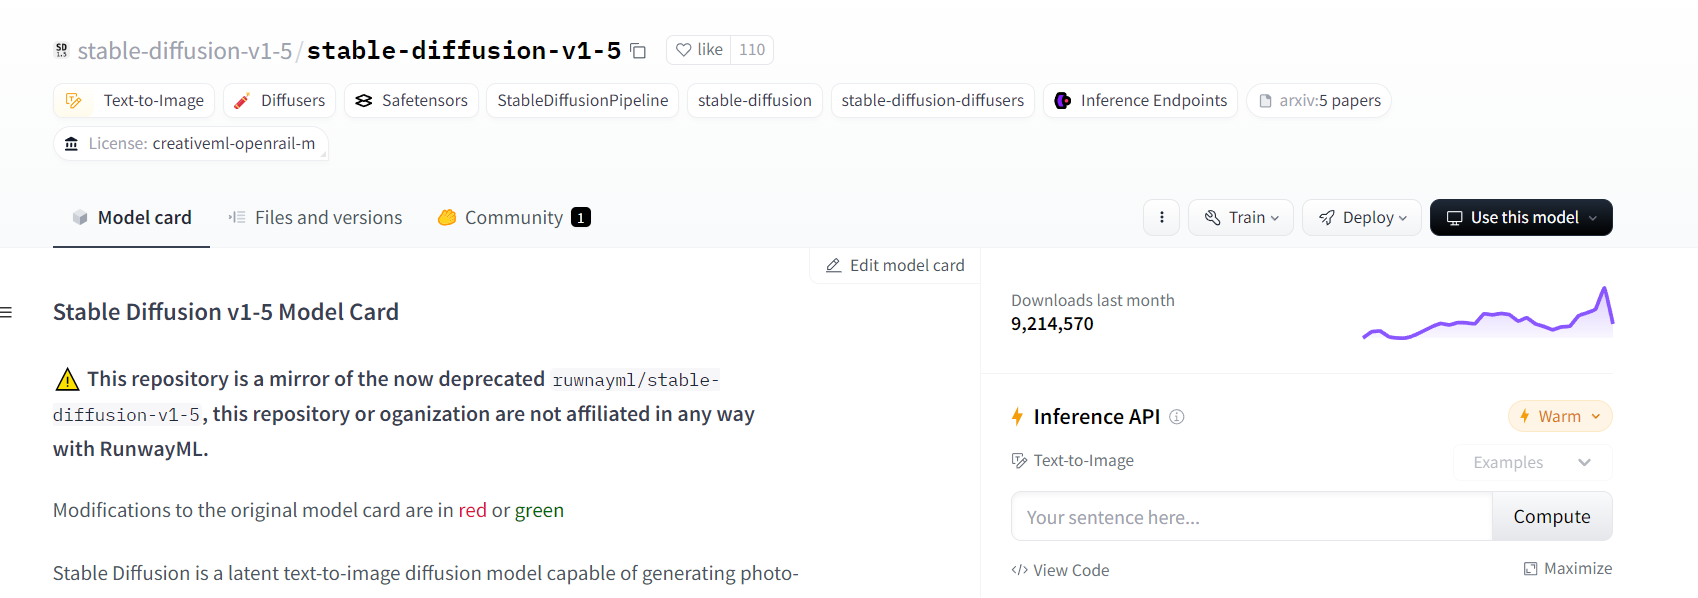

Нажимая на кнопку "Use this model" мы увидим код для встраивания через интерфейс `DiffusionPipeline` библиотеки Diffusers. Напомним,  что концепция конвейера `pipeline` позволяет сразу использовать модель на заданных входных данных. Конвейер скрывает под собой процесс загрузки и подготовки модели. Выглядит все очень просто!

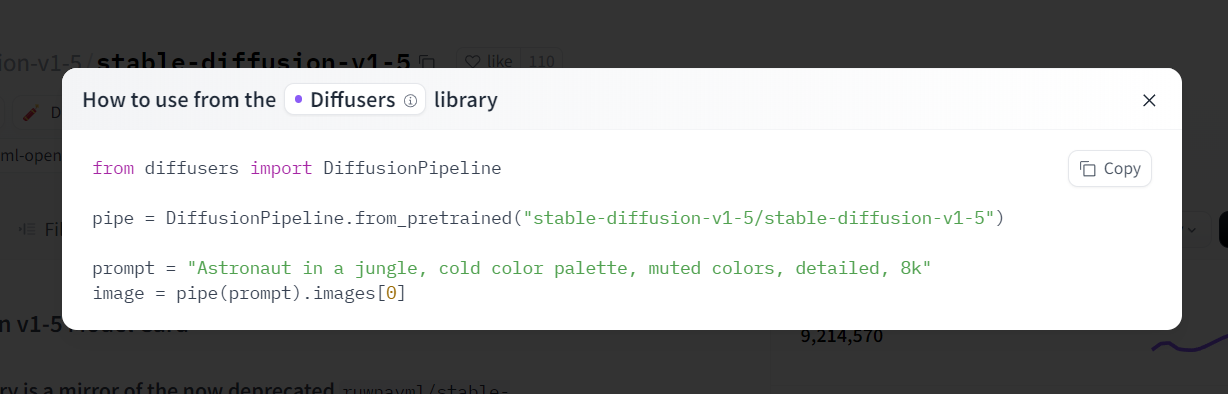

Первым делом импортируем все необходимые библиотеки. Нам также понадобится библиотека `Pillow` для работы с изображением и `requests` для загрузки изображения по URL.

In [ ]:
from diffusers import DiffusionPipeline
import gradio as gr
from PIL import Image

Создадим конвейер с выбранной моделью:

In [ ]:
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")

Придумаем запрос (Prompt) на английском языке:

Prompt Ru: верблюжий караван идущий по пустыне в лучах заката, в стиле Васнецова
Prompt En: camel caravan walking through the desert in the sunset, in the style of Vasnetsov

In [3]:
prompt = "camel caravan walking through the desert in the sunset, in the style of Vasnetsov"

Запустим конвейер нашей диффузионной модели с данным промпотом:

In [ ]:
out = pipe(prompt)

Выведем результат работы модели:

In [ ]:
out.images[0]

Теперь для удобства создадим функцию, принимающую на вход запрос в формате теста, в которой вызывается наша модель нейронной сети. Функция должна вернуть изображение в формате библиотеки PIL

In [8]:
def captioner(prompt):
    result = pipe(prompt)
    return result.images[0]

Вызовем функцию для тестирования:

In [ ]:
captioner(prompt)

Как видим, получаем строку с описанием. Эту строку мы можем выводить дальше куда угодно, например в интерфейс Gradio

## 3/ Создание WEB-интерфейса с помощью `gr.Interface()`

Теперь мы можем создать простое графической web-приложение с помощью python библиотеки `gradio`. **В этом и состоит ваше основное задание.** 

Создайте новый Jupyter Notebook или Python Script, в котором будете писать код вашего приложения. В новый файл импортируйте библиотеку Transformer, как это было сделано выше

Под нашу задачу требуется изменить структуру интерфейса следующим образом:
* в качестве входного блока (и, соответствеенно, входных данных) будет использоваться текстовый блок `gr.Textbox()`, в которой будет вставляться ссылка на изображение
* будет два выходных блока:
  1. блок вывода изображения `gr.Image()`, в котором отобразиться сгенерированное изображение 

Если вы вызвать запуск интерфейса  `demo.launch()` в Jupyter Notebook то оно откроется внутри файла Notebook. В этом случае не нужно открывать ссылку через бразуер. 

Скриншот того, как это выглядит:

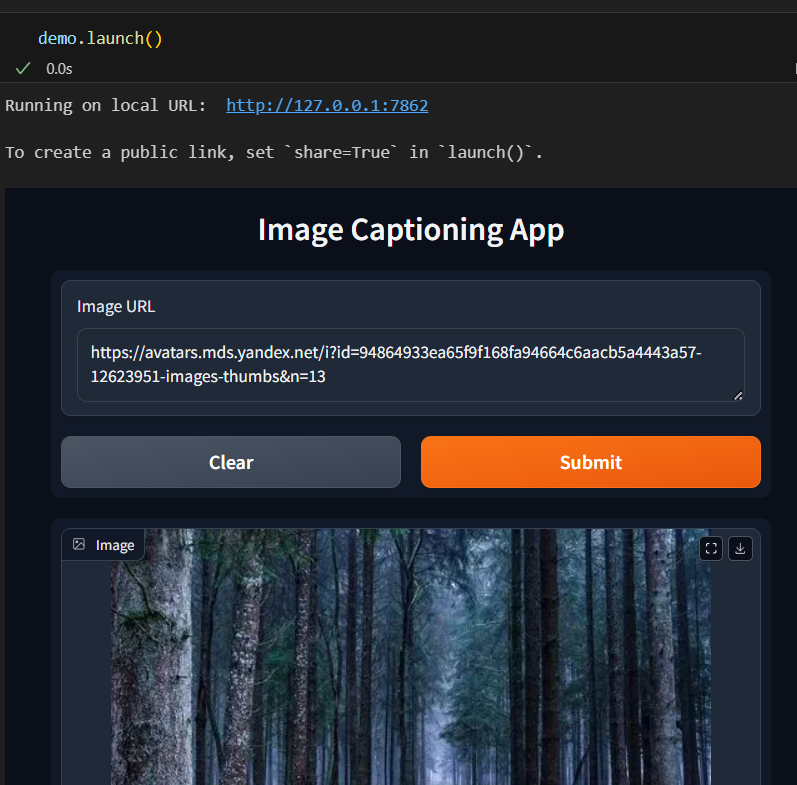

## Форма отчетности
В качестве отчета по лабораторной работе вам необходимо предоставить:
1. Файл с кодом вашего приложения (Python Script или Jupyter Nonebook)
2. Скриншот работы графического web-интерфейса вашего приложения

Отчет разместить на [Google диске](https://drive.google.com/drive/folders/1xhGVF935teSij4CIjEqy2XFADXUUBYRc?usp=sharing). 

Найдите папку вашей подгруппы, в ней создайте папку с вашей фамилией. Именно там вы будете помещать все отчеты по лабораторным занятиям. Для отчета по данной работе создайте папку с именем "ЛР1" и поместите туда ваш отчет.